# Planning a Telescope Observation

You want to know how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy). The key piece of information here is that the weather tomorrow depends on the weather today. From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$

- We can start with the sky conditions today and make predictions going forward more and more into the future.
- This will look like a big decision tree. 
- After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

$$p({\rm clear}) = 0.83,$$

and 

$$p({\rm cloudy}) = 0.17.$$

You get the same answer for day $N$ as day $N+1$ and it doesn't matter whether it was clear or cloudy on the day that you started. The steps that we have taken in this process are, indeed, a **MARKOV CHAIN**.

In [9]:
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

import astroML.stats

- Start off on a cloud day. 
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with $N\gtrsim 10^4$)
- Prepare a plot with the number of days on the x axis and the cumulative number of, say, sunny days over the number of days so far on the y axis. This is called a **trace-plot**, showing how our estimate of $p(\mathrm{clear})$ evolves as the chain samples.  
- Prepare a histogram of the above plot. This reveals the distribution of $p(\mathrm{clear})$.
- Use a summary statistics to determine the most likely value and an error on our estimate.

I started by making a function which is going to tell me the weather tomorrow due to the weather today, following the probability.
- 1 is clear
- 0 is cloudy

In [2]:
#1 is clear, 0 is cloudy

def weather_tmrw(today):
    forecast = np.random.uniform(0, 1, 1)
    if today == 1:
        if forecast < 1:
            return 0
        else:
            return 1
    else:
        if forecast < 0.5:
            return 0
        else:
            return 1

I run the simulation and plot the results into a Trace plot, without the burn-in.

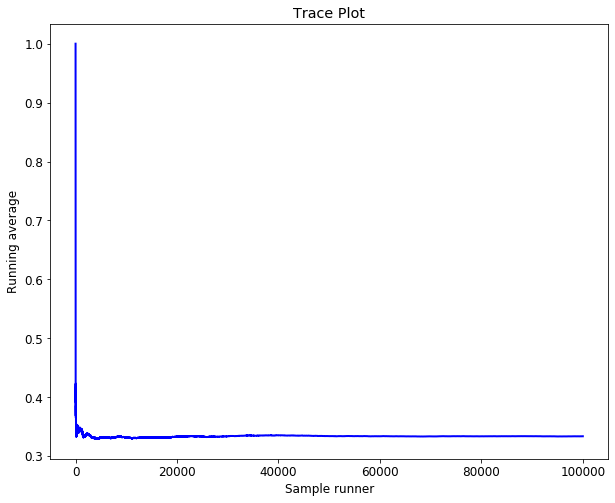

In [13]:
N = int(1e5)
day1 = 0 #cloudy day

weather = np.empty(N)
today = weather_tmrw(day1)

weather[0]=today

for i in range(N-1):
    today = weather_tmrw(today)
    weather[i+1]=today

#I find the average 
total = np.cumsum(weather)/(np.arange(0,N)+1)
#print(total)
plt.plot(total, color='b', lw=2)
plt.xlabel('Sample Runner')
plt.ylabel('Running Average')
plt.title('Trace Plot')
plt.show()    

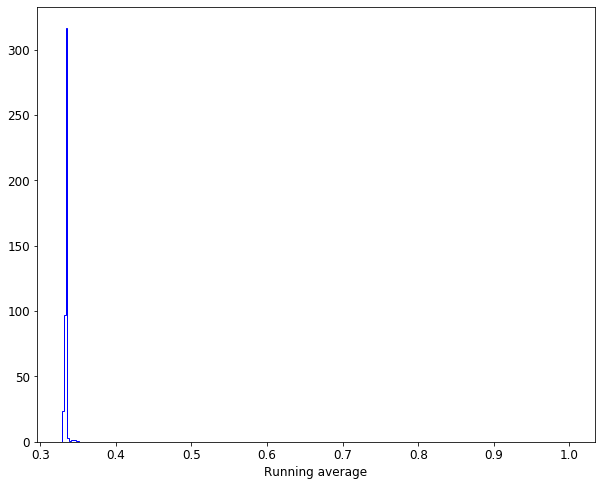

In [17]:
#I plot the trace run into an histogram

plt.hist(total, bins=300, density=True, histtype='step', color='b')
plt.xlabel('Running average')
plt.title('Distribution of Clear Days')
plt.show()

Now I take into consideration different burn-in phases, in order to remove some samples at the beginning, which are responsible of the long tails in the Trace plot.

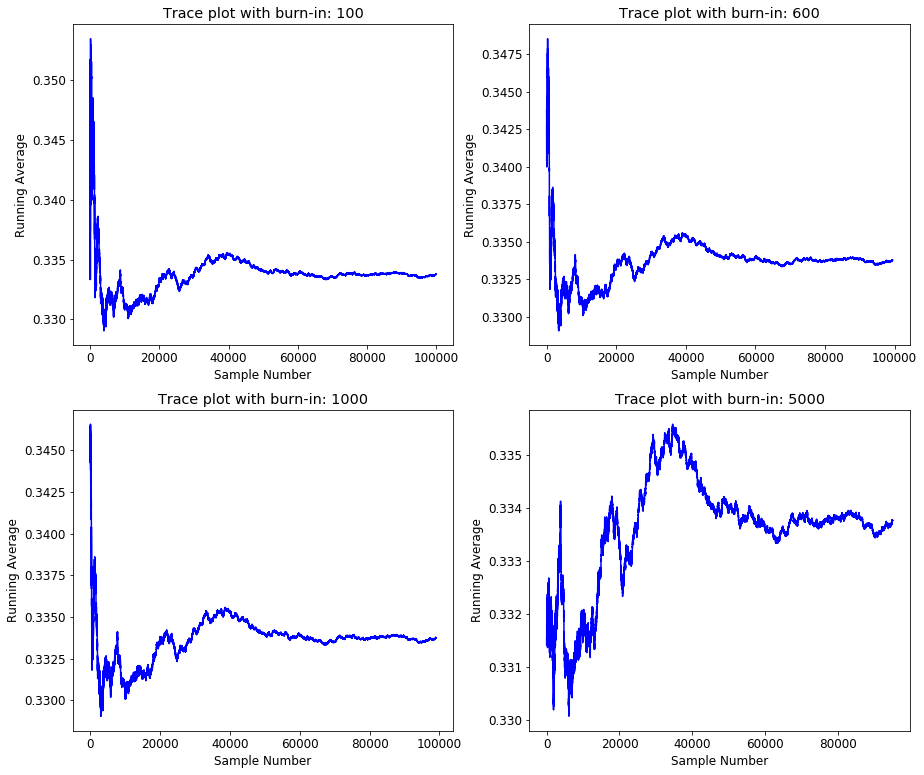

In [27]:
burnin = [100, 600, 1000, 5000]

fig, ax = plt.subplots(2, 2, figsize=(15, 13))
axs = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]
bins = np.linspace(-2, 2, 100)

for a, i in zip(axs, range(len(burnin))):
    a.plot(total[burnin[i]:], color='b', lw=1.5)
    a.set_title('Trace plot with burn-in: %i' %burnin[i])
    a.set_xlabel('Sample Number')
    a.set_ylabel('Running Average')
plt.show()

Now I plot the histogram of the trace plot with burn-in 5000.

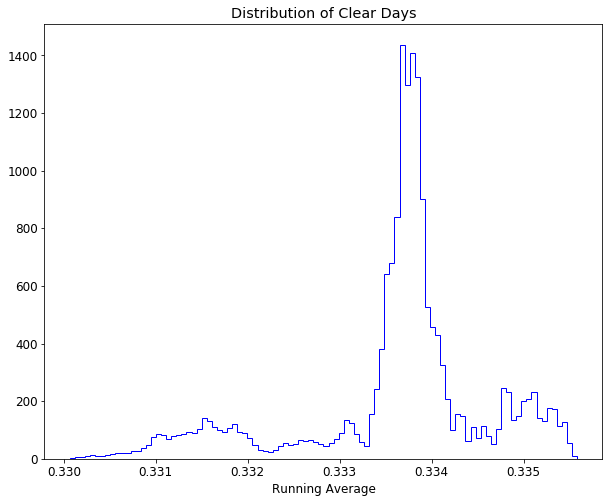

In [24]:
burnin = 5000

plt.hist(total[burnin:], bins=100, density=True, histtype='step', color='b') #total[burnin:] I am deleting the first 5000 elements of total
plt.xlabel('Running Average')
plt.title('Distribution of Clear Days')
plt.show()

Now I use a summary statistics to determine the most likely value and an error on our estimate.

In [25]:
median = np.median(total[burnin:])
sigma = astroML.stats.sigmaG(total[burnin:])

print('The median of the distribution is:', median)
print('The error is:', sigma)

The median of the distribution is: 0.3337543828882643
The error is: 0.0003709101312723282
